# TimeCopilot Forecaster (Anomaly Detection)

## Import libraries

In [73]:
import pandas as pd
from timecopilot import TimeCopilotForecaster


## Load the dataset. 

The DataFrame must include at least the following columns:
- unique_id: Unique identifier for each time series (string)
- ds: Date column (datetime format)
- y: Target variable for forecasting (float format)


In [83]:
df = pd.read_csv(
    "s3://timecopilot/public/data/taylor_swift_pageviews.csv",
    parse_dates=["ds"],
)
df


,unique_id,ds,y
0,Taylor Swift,2015-07-01,35747
1,Taylor Swift,2015-07-02,25564
2,Taylor Swift,2015-07-03,26749
3,Taylor Swift,2015-07-04,34108
4,Taylor Swift,2015-07-05,30541
...,...,...,...
545,Taylor Swift,2016-12-27,18750
546,Taylor Swift,2016-12-28,19094
547,Taylor Swift,2016-12-29,16701
548,Taylor Swift,2016-12-30,17277


## Import the models you want to use

In [84]:
from timecopilot.models.stats import SeasonalNaive, Theta
from timecopilot.models.foundation.chronos import Chronos


## Create a TimeCopilotForecaster


In [85]:

tcf = TimeCopilotForecaster(
    models=[
        Chronos(repo_id="amazon/chronos-bolt-mini"),
        SeasonalNaive(),
        Theta(),
    ]
)

## Plot the data

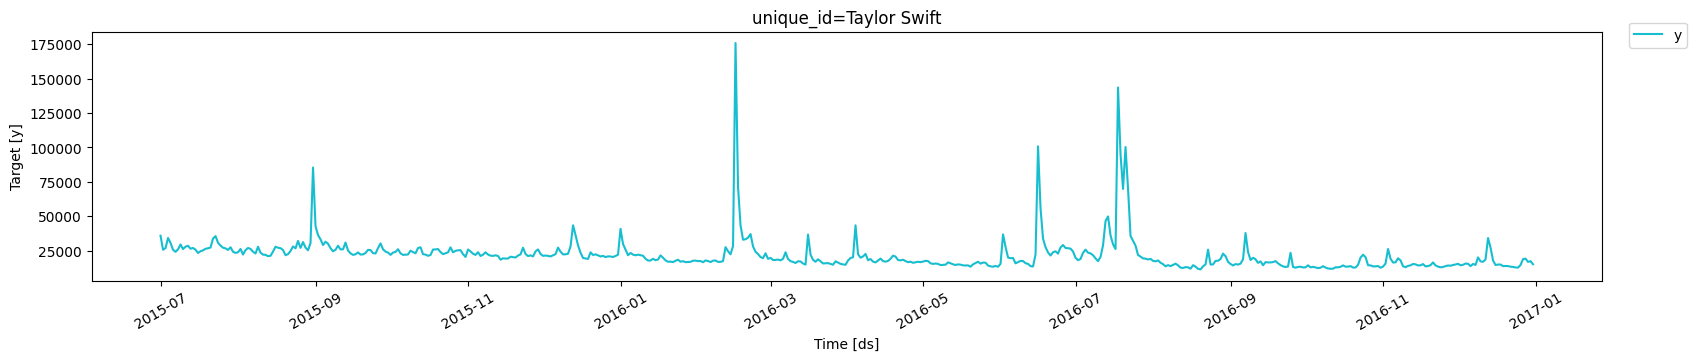

In [86]:
tcf.plot(df)


## Detect anomalies

You can optionally specify the following parameters:
- freq: The frequency of your data (e.g., 'D' for daily, 'M' for monthly). If you skip it, it will be inferred by default.
- h: The forecast horizon, which is the number of periods to predict during cross validation (you can skip it, and it will use an inferred seasonality)


In [ ]:
anomalies_df = tcf.detect_anomalies(df=df, h=7, level=95)

In [88]:
anomalies_df

,unique_id,ds,cutoff,y,Chronos,Chronos-lo-95,Chronos-hi-95,Chronos-anomaly,SeasonalNaive,SeasonalNaive-lo-95,SeasonalNaive-hi-95,SeasonalNaive-anomaly,Theta,Theta-lo-95,Theta-hi-95,Theta-anomaly
0,Taylor Swift,2015-07-12,2015-07-11,28446,27245.367188,3838.395804,50652.338571,False,27778.0,4588.357311,50967.642689,False,26793.433594,1411.241950,52175.625238,False
1,Taylor Swift,2015-07-13,2015-07-11,26306,27652.929688,4245.958304,51059.901071,False,27778.0,4588.357311,50967.642689,False,26552.589844,1170.398200,51934.781488,False
2,Taylor Swift,2015-07-14,2015-07-11,26854,27695.091797,4288.120414,51102.063180,False,27778.0,4588.357311,50967.642689,False,26311.744141,929.552496,51693.935785,False
3,Taylor Swift,2015-07-15,2015-07-11,25608,27835.630859,4428.659476,51242.602243,False,27778.0,4588.357311,50967.642689,False,26070.898438,688.706793,51453.090082,False
4,Taylor Swift,2015-07-16,2015-07-11,23206,27993.738281,4586.766898,51400.709665,False,27778.0,4588.357311,50967.642689,False,25830.052734,447.861090,51212.244379,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,Taylor Swift,2016-12-27,2016-12-24,18750,13295.556641,-10111.414743,36702.528024,False,12698.0,-10491.642689,35887.642689,False,13052.781250,-12329.410394,38434.972894,False
535,Taylor Swift,2016-12-28,2016-12-24,19094,13144.851562,-10262.119821,36551.822946,False,12698.0,-10491.642689,35887.642689,False,13042.810547,-12339.381097,38425.002191,False
536,Taylor Swift,2016-12-29,2016-12-24,16701,13144.851562,-10262.119821,36551.822946,False,12698.0,-10491.642689,35887.642689,False,13032.839844,-12349.351800,38415.031488,False
537,Taylor Swift,2016-12-30,2016-12-24,17277,13245.321289,-10161.650094,36652.292672,False,12698.0,-10491.642689,35887.642689,False,13022.868164,-12359.323480,38405.059808,False


## Plot results

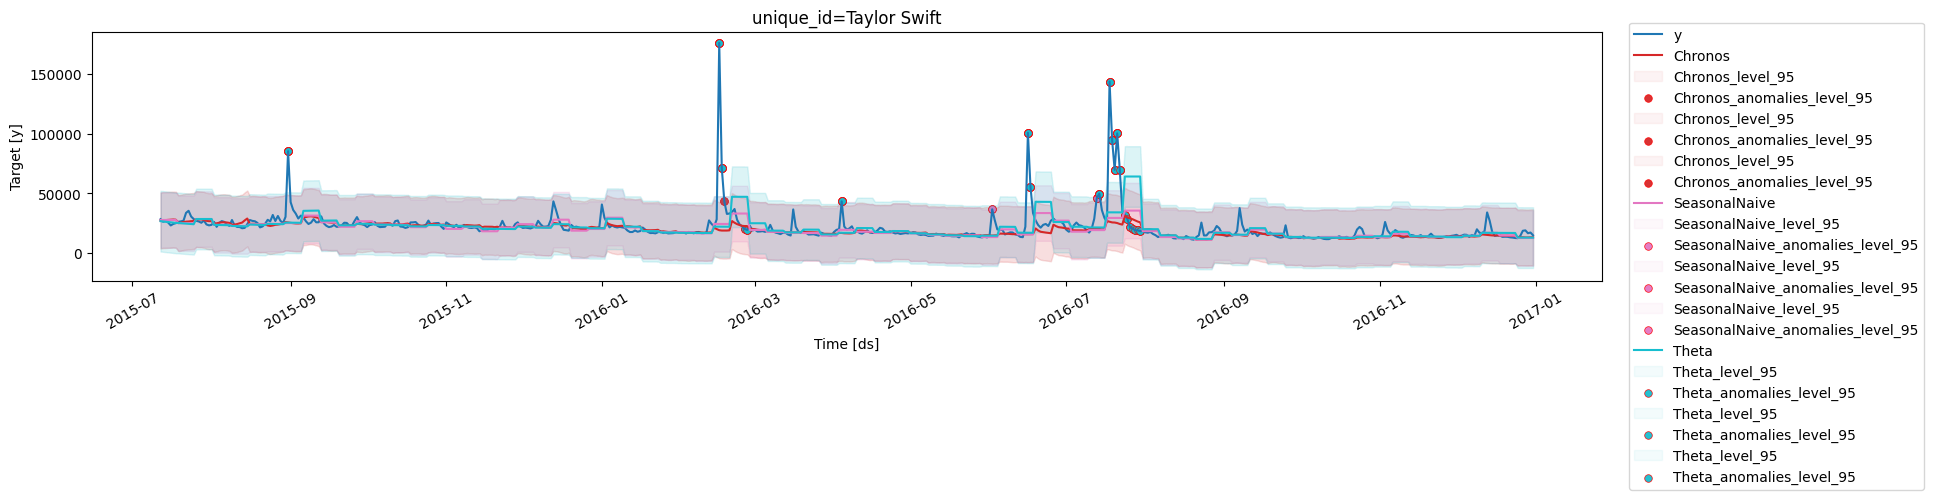

In [89]:
tcf.plot(df, anomalies_df)